Data source: http://cricsheet.org/ 

Targeted feature set:

• Ball Number for a match (Numeric)  
• Match number (Numeric)  
• Score in Previous Match (Numeric)  
• Number of Wickets Down (Numeric)  
• Run Rate (Numeric)  
• Inning (Numeric)  
• Stadium (Nominal)  
• Non Striker Batsman (Nominal)  
• Bowler (Nominal)  
• Number of Delivery since last boundary (Numeric)  


In [2]:
import yaml
from collections import defaultdict
virat_score= defaultdict(list)
for file_yalm in full_file_paths:
    with open(file_yalm, 'r') as stream:
        try:
            match_details= yaml.load(stream) # get all the data of a match.
            break
        except yaml.YAMLError as exc:
            print(exc)



In [4]:
#read all the yalm files from the directory
import os

def get_filepaths(directory):
    """
    This function will generate the file names in a directory 
    tree by walking the tree either top-down or bottom-up. For each 
    directory in the tree rooted at directory top (including top itself), 
    it yields a 3-tuple (dirpath, dirnames, filenames).
    """
    file_paths = []  # List which will store all of the full filepaths.

    # Walk the tree.
    for root, directories, files in os.walk(directory):
        
        for filename in files:
            if filename.endswith(".yaml"):
            # Join the two strings in order to form the full filepath.
                filepath = os.path.join(root, filename)
                file_paths.append(filepath)  # Add it to the list.

    return file_paths  

# Run the above function and store its results in a variable.   
full_file_paths = get_filepaths("/Users/sumantbhandari/Desktop/Fall 2016/Applied ML/Project/ipl")


In [11]:
# calling method to check status for a particular batsman ( Virat Kohli)


def viratkistory(match_details):
    for i in range(len(match_details['innings'])):
        count=1
        for deliveries in match_details['innings'][i].values():
            for delivery in deliveries['deliveries']:
                for delivery_info in delivery.values():
                    if delivery_info['batsman'].lower().find('kohli') != -1:
                        virat_score[count].append(delivery_info['runs']['batsman'])
                        count += 1
                        
import yaml
from collections import defaultdict
virat_score= defaultdict(list)
for file_yalm in full_file_paths:
    with open(file_yalm, 'r') as stream:
        try:
            match_details= yaml.load(stream) # get all the data of a match.
            viratkistory(match_details)
        except yaml.YAMLError as exc:
            print(exc)

        

In [12]:
# cleansing the data
# changing all the 3's into 4's
# changing position of 6 to 4
# Since, 3 and 5 ore omitted , we have the following sequence, 0,1,2,3,4
# where 4 is equivalent 3 and 6 is weuivalent to 4

for key,values in virat_score.items():
    for each in values:
        if each == 4:
            virat_score[key][values.index(each)]= 3
        elif each == 6:
            virat_score[key][values.index(each)]= 4
        else:
            pass

In [13]:
# analysis of total run score by Mr Kohli
a=defaultdict(int)
for values in virat_score.values():
    for each in values:
        a[each] = a[each]+1
        
#import matplotlib.pyplot as plt

#print(virat_score.values())
#plt.bar(range(len(a)),a.values(), align='center')
#plt.show()


In [ ]:
# coming to analysis of # of ball wise
plt.hist(virat_score[2])
plt.show()


In [14]:
# starting to build a pandas data frame to do all the analysis hereafter
import pandas as pd

columns =['Ball number','# Match', 'Last Match Score', 'Wickets down', 'Run Rate', 'Inning' ,\
          'Stadium' , 'Bowler', 'Non Striker' 'score']
index= range(1,sum(a.values())+1)
df = pd.DataFrame(index=index, columns=columns)

loc=1
for key, value in virat_score.items():
    for each in value:
        df.loc[loc]['Ball number']= key
        df.loc[loc]['score']= each
        loc += 1
    



In [5]:
# building a data frame 
import math
def round_rr(number):
    return round(number * 2) / 2

def roundup(x):
     return int(math.floor(x / 10.0)) * 10


    
    

def viratkistory(match_details):
    #Addition on Nov 20
    global match_number
    global loc
    global last_match_score
                 # to find the total runs scored by the batsman
    #temp = 0
    inning='1st innings'
    
    for i in range(len(match_details['innings'])):
       
        #if match_details['innings'][i].keys() not in ['1st innings','2nd innings']:
        if not set(match_details['innings'][i].keys()).issubset(set(('1st innings','2nd innings'))):
            #print(match_details['innings'][i].keys())
            continue
        elif match_details['innings'][i][inning]['team'] != "Royal Challengers Bangalore":
                inning='2nd innings'
                continue
        
        else:
            match_number += 1 
            inning='2nd innings' 
            count=1
            runs = 0          # to find the  run rate on the board
            runs_bats=0       # to find the strike rate of the batsman
            runs_batsman = 0
            ball_nu=0         # to find the run rate
            wickets = 0       # to find the total number of wickets down
            last_boundary =0  # delivery from last boundary
            
            for deliveries in match_details['innings'][i].values():
                for delivery in deliveries['deliveries']:
                    for delivery_info in delivery.values():
                        ball_nu += 1 
                        

                        if 'wicket' in delivery_info.keys():
                            wickets = wickets + 1

                        if delivery_info['batsman'].lower().find('kohli') != -1:
                            #calculating run_rate

                            
    
                            run_rate=round_rr(round((runs/ball_nu*6),1))
                            #temp = 1         # for storing mtch number 
                            virat_df.loc[loc]['Ball_number']= count
                            virat_df.loc[loc]['Score']= delivery_info['runs']['batsman']
                            virat_df.loc[loc]['Inning']= i
                            virat_df.loc[loc]['Non_Striker']= delivery_info['non_striker']
                            virat_df.loc[loc]['Bowler']= delivery_info['bowler']
                            virat_df.loc[loc]['Wickets_down']= wickets
                            virat_df.loc[loc]['Run_Rate']= run_rate
                            sr= int(round(runs_bats/count*100,0))
                            sr_round=roundup(sr)
                            virat_df.loc[loc]['StrikeRate_lastball']= sr_round
                            virat_df.loc[loc]['last_boundary']= last_boundary
                            virat_df.loc[loc]['Match_nu']= match_number
                            virat_df.loc[loc]['Last_Match_Score']= last_match_score
                            if 'city' in match_details['info']:
                                virat_df.loc[loc]['Stadium']= match_details['info']['city']
                            elif 'venue' in match_details['info']:
                                 virat_df.loc[loc]['Stadium']= match_details['info']['venue']
                            else:
                                pass
                            runs_bats += delivery_info['runs']['batsman']
                            count += 1
                            loc += 1
                            last_boundary +=1
                            if delivery_info['runs']['batsman'] >2:
                                last_boundary=0
                        runs += delivery_info['runs']['total']
        

    
    #matchnum_in_series += temp
            last_match_score = runs_bats
    return match_number, last_match_score, loc;
                        

# main    
import yaml
from collections import defaultdict
import pandas as pd

columns =['Ball_number','Match_nu', 'Last_Match_Score', 'Wickets_down', 'Run_Rate','StrikeRate_lastball','last_boundary', 'Inning' ,\
          'Stadium' , 'Bowler', 'Non_Striker', 'Score']

index= range(1,15000)
virat_df= pd.DataFrame(index=index, columns=columns)
match_number=0
loc = 1
last_match_score = 42 # considering his batting average as the last match score
for file_yalm in full_file_paths:
    
      #location has to be passed from outside otherwise it will overwrite the previous location value
    with open(file_yalm, 'r') as stream:
        try:
            
            match_details = yaml.load(stream) # get all the data of a match.
            #match_number, last_match_score, loc = viratkistory(match_details, match_number, last_match_score , loc)
            viratkistory(match_details)
            
        except yaml.YAMLError as exc:
            print(exc)

In [ ]:
# making test and train sets for analysis  removing the Nans
virat_testdf = virat_df.dropna()

In [229]:
virat_testdf.groupby('Ball_number').count()

,Match_nu,Last_Match_Score,Wickets_down,Run_Rate,StrikeRate_lastball,last_boundary,Inning,Stadium,Bowler,Non_Striker,Score
Ball_number,,,,,,,,,,,
1,131,131,131,131,131,131,131,131,131,131,131
2,127,127,127,127,127,127,127,127,127,127,127
3,123,123,123,123,123,123,123,123,123,123,123
4,122,122,122,122,122,122,122,122,122,122,122
5,118,118,118,118,118,118,118,118,118,118,118
6,114,114,114,114,114,114,114,114,114,114,114
7,113,113,113,113,113,113,113,113,113,113,113
8,112,112,112,112,112,112,112,112,112,112,112
9,106,106,106,106,106,106,106,106,106,106,106


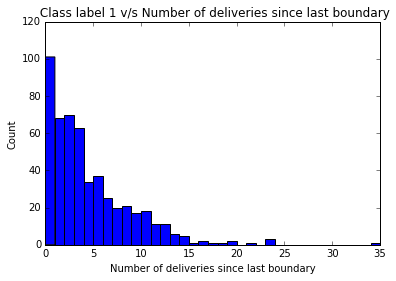

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(virat_testdf[virat_testdf['Score'] == 1].last_boundary, bins= 35)
plt.title(' Class label 1 v/s Number of deliveries since last boundary')
plt.xlabel('Number of deliveries since last boundary')
plt.ylabel('Count')
plt.show()

In [12]:
for i in range(2,len(virat_testdf['Score'])):
    if virat_testdf.loc[i]['Score'] in [3,4,6]:
        virat_testdf.loc[i]['Score'] = 1
    else:
        virat_testdf.loc[i]['Score'] = 0


In [222]:
count0= 0
count1 =0
for i in range(2,len(virat_testdf['Score'])):
    if virat_testdf.loc[i]['Score'] == 0:
        count0 +=1
    else:
        count1 += 1
print(count0)
print(count1)

2714
519


In [427]:

from sklearn.cross_validation import train_test_split
train, test = train_test_split(virat_testdf, test_size = 0.3)

In [428]:
X_train = pd.get_dummies(train[[0,6]])
X_test= pd.get_dummies(test[[0,6]])
X_train['Score']= train.iloc[:, -1]
X_test['Score']= test.iloc[:, -1]

In [429]:
print(X_train.columns.equals(X_test.columns))

print(X_train.shape)
print(X_test.shape)

diff=X_train.columns.difference(X_test.columns)
diff1=X_test.columns.difference(X_train.columns)

False
(2264, 97)
(971, 95)


In [430]:
for i in diff:
    if i in X_train.columns.values.tolist():
        del X_train[i]
    elif i in X_test.columns.values.tolist():
        del X_test[i]
for i in diff1:
    if i in X_train.columns.values.tolist():
        del X_train[i]
    elif i in X_test.columns.values.tolist():
        del X_test[i]
        

In [431]:
Y_train= X_train.pop('Score')
Y_test= X_test.pop('Score')

In [443]:
Y_test.value_counts()

0    805
1    166
Name: Score, dtype: int64

In [461]:
#from sklearn import svm
#import numpy as np
#gnb = svm.SVC()
#gnb.fit(X_train,pd.to_numeric(Y_train))
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, pd.to_numeric(Y_train))
#clf_probs = clf.predict_proba(X_test)
#score = log_loss(Y_test, clf_probs)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [462]:
a=clf.predict(X_test)

In [463]:
from sklearn.metrics import confusion_matrix
confusion_matrix(list(np.array(Y_test)), list(a))

array([[778,  27],
       [157,   9]])

In [223]:
#virat_testdf0=virat_testdf0[1:522]
import numpy as np
virat_testdf0= virat_testdf[virat_testdf.Score == 0]
rows = np.random.choice(virat_testdf0.index.values, 250, replace=False)
sampled_df0_train = virat_testdf0.ix[rows]




In [224]:
virat_testdf1= virat_testdf[virat_testdf.Score == 1]
rows1 = np.random.choice(virat_testdf1.index.values, 250, replace=False)
sampled_df1_train= virat_testdf1.ix[rows1]

frames = [sampled_df1_train, sampled_df0_train]
virat_train_final = pd.concat(frames)

In [225]:
virat_test_final = virat_testdf[~(virat_testdf.index.isin(np.append(rows1,rows)))]

In [226]:
virat_test_final.shape

(2735, 12)

In [92]:
def pandas2arff(df,filename,wekaname = "pandasdata",cleanstringdata=True,cleannan=True):
    """
    converts the pandas dataframe to a weka compatible file
    df: dataframe in pandas format
    filename: the filename you want the weka compatible file to be in
    wekaname: the name you want to give to the weka dataset (this will be visible to you when you open it in Weka)
    cleanstringdata: clean up data which may have spaces and replace with "_", special characters etc which seem to annoy Weka. 
                     To suppress this, set this to False
    cleannan: replaces all nan values with "?" which is Weka's standard for missing values. 
              To suppress this, set this to False
    """
    import re
    
    def cleanstring(s):
        if s!="?":
            return re.sub('[^A-Za-z0-9]+', "_", str(s))
        else:
            return "?"
            
    dfcopy = df #all cleaning operations get done on this copy

    
    if cleannan!=False:
        dfcopy = dfcopy.fillna(-999999999) #this is so that we can swap this out for "?"
        #this makes sure that certain numerical columns with missing values don't get stuck with "object" type
    import numpy as np
    f = open(filename,"w")
    arffList = []
    arffList.append("@relation " + wekaname + "\n")
    #look at each column's dtype. If it's an "object", make it "nominal" under Weka for now (can be changed in source for dates.. etc)
    for i in range(df.shape[1]):
        if dfcopy.dtypes[i]=='O' or (df.columns[i] in ["Class","CLASS","class"]):
            if cleannan!=False:
                dfcopy.iloc[:,i] = dfcopy.iloc[:,i].replace(to_replace=-999999999, value="?")
            if cleanstringdata!=False:
                dfcopy.iloc[:,i] = dfcopy.iloc[:,i].apply(cleanstring)
            _uniqueNominalVals = [str(_i) for _i in np.unique(dfcopy.iloc[:,i])]
            _uniqueNominalVals = ",".join(_uniqueNominalVals)
            _uniqueNominalVals = _uniqueNominalVals.replace("[","")
            _uniqueNominalVals = _uniqueNominalVals.replace("]","")
            _uniqueValuesString = "{" + _uniqueNominalVals +"}" 
            arffList.append("@attribute " + df.columns[i] + _uniqueValuesString + "\n")
        else:
            arffList.append("@attribute " + df.columns[i] + " real\n") 
            #even if it is an integer, let's just deal with it as a real number for now
    arffList.append("@data\n")           
    for i in range(dfcopy.shape[0]):#instances
        _instanceString = ""
        for j in range(df.shape[1]):#features
                if dfcopy.dtypes[j]=='O':
                    _instanceString+="\"" + str(dfcopy.iloc[i,j]) + "\""
                else:
                    _instanceString+=str(dfcopy.iloc[i,j])
                if j!=dfcopy.shape[1]-1:#if it's not the last feature, add a comma
                    _instanceString+=","
        _instanceString+="\n"
        if cleannan!=False:
            _instanceString = _instanceString.replace("-999999999.0","?") #for numeric missing values
            _instanceString = _instanceString.replace("\"?\"","?") #for categorical missing values
        arffList.append(_instanceString)
    f.writelines(arffList)
    f.close()
    del dfcopy
    return True


In [464]:
pandas2arff(virat_testdf,"ClusterSet.arff")


True